f:\anaconda\envs\FYP\lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:3527.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


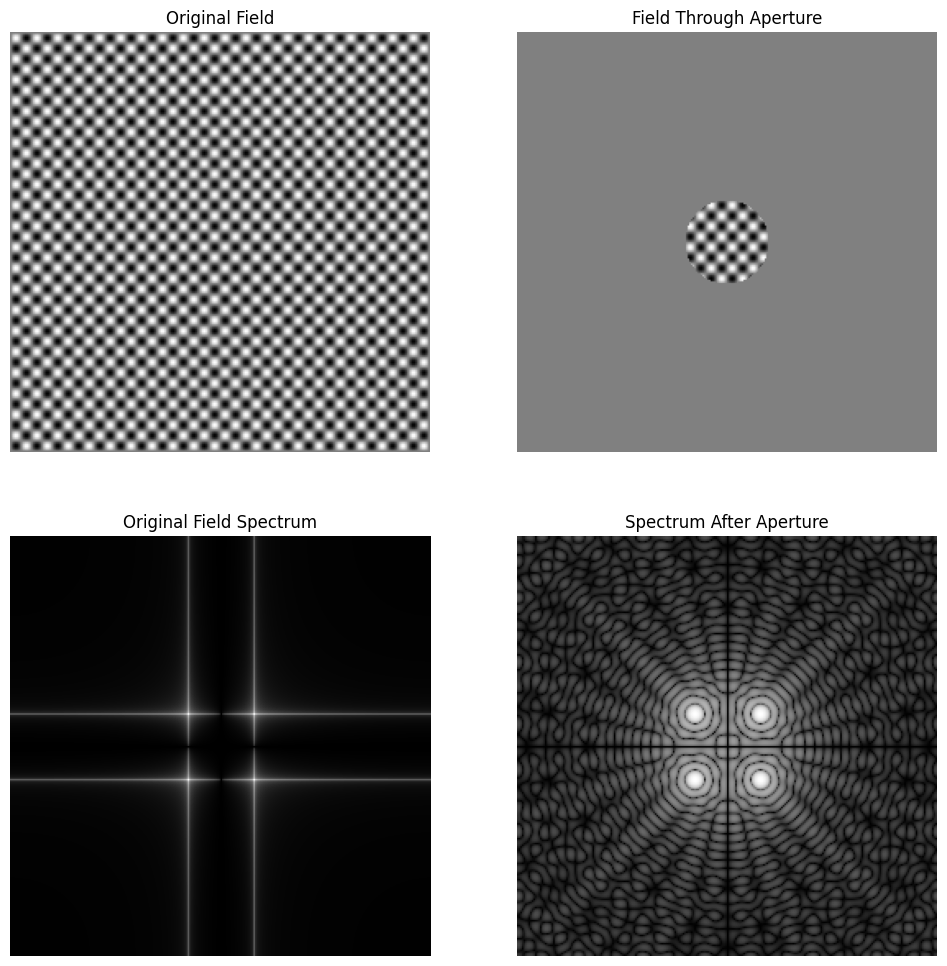

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

grid_size = 256
L = 1e-3 # the side length of the field
a = 0.1 * L  # the radius of the aperture

# 创建网格
x = torch.linspace(-L/2, L/2, grid_size)
y = torch.linspace(-L/2, L/2, grid_size)
X, Y = torch.meshgrid(x, y)
R = torch.sqrt(X**2 + Y**2)

# define the field
U = torch.sin(20 * 2 * np.pi * X / L) * torch.sin(20 * 2 * np.pi * Y / L)

# create the aperture
aperture = (R <= a).float()

# the field after the aperture
U_aperture = U * aperture

# calculate the Fourier transform
U_fft = torch.fft.fftshift(torch.fft.fft2(U))
U_aperture_fft = torch.fft.fftshift(torch.fft.fft2(U_aperture))

# calculate the magnitude of the Fourier transform
U_fft_magnitude = torch.abs(U_fft)
U_aperture_fft_magnitude = torch.abs(U_aperture_fft)

# visualize the results
plt.figure(figsize=(12, 12))

# the original field
plt.subplot(2, 2, 1)
plt.imshow(U.numpy(), cmap='gray')
plt.title('Original Field')
plt.axis('off')

# the field after the aperture
plt.subplot(2, 2, 2)
plt.imshow(U_aperture.numpy(), cmap='gray')
plt.title('Field Through Aperture')
plt.axis('off')

# the magnitude of the spectrum of the original field
plt.subplot(2, 2, 3)
plt.imshow(torch.log(U_fft_magnitude + 1).numpy(), cmap='gray')
plt.title('Original Field Spectrum')
plt.axis('off')

# the magnitude of the spectrum of the field after the aperture
plt.subplot(2, 2, 4)
plt.imshow(torch.log(U_aperture_fft_magnitude + 1).numpy(), cmap='gray')
plt.title('Spectrum After Aperture')
plt.axis('off')

plt.show()
